# Statistical Analysis 2


In [1]:
## Retrieve file from github
import pandas as pd

url = "https://raw.githubusercontent.com/sookuan/S-SB-Workshop/master/00-R-In-Class/DryEye.csv"
df = pd.read_csv(url, error_bad_lines = False)
df.head()

,notreat,herb
0,2.372074,1.476645
1,1.957100,1.322809
2,1.996542,0.966512
3,2.087404,1.349170
4,1.815421,1.270205


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
notreat    50 non-null float64
herb       50 non-null float64
dtypes: float64(2)
memory usage: 880.0 bytes


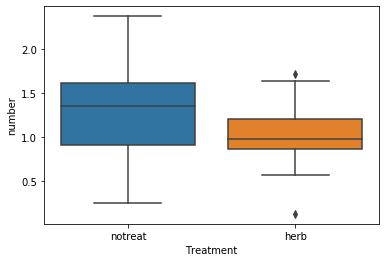

In [6]:
## Draw Boxplot
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.melt(df, var_name='Treatment', value_name = 'number')
df2 = sns.boxplot(x= "Treatment", y ="number", data = df1)
plt.show()

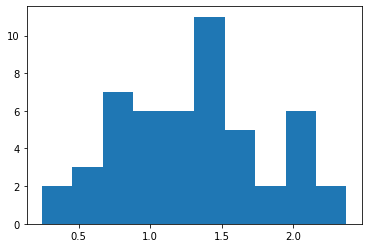

In [16]:
## Draw Histogram before treatment
notreat = df1['Treatment'] == 'notreat'
df2 = df1[notreat]
plt.hist(x=df2['number'], bins =10)
plt.show()

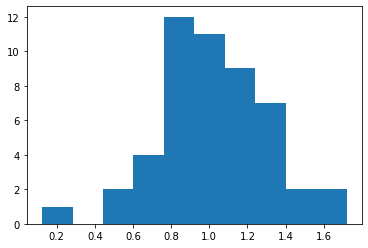

In [17]:
## Draw Histogram after herb treatment
herb = df1['Treatment'] == 'herb'
df1[herb]
df3 = df1[herb]
plt.hist(x=df3['number'], bins =10)
plt.show()

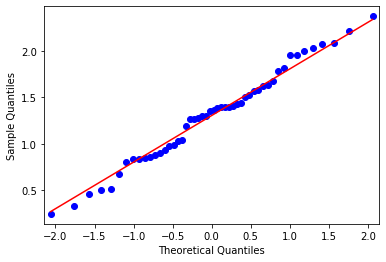

In [24]:
## Draw QQ plot before treatment
import statsmodels.api as sm
import pylab as py
sm.qqplot(df2['number'], line = 's')
py.show()

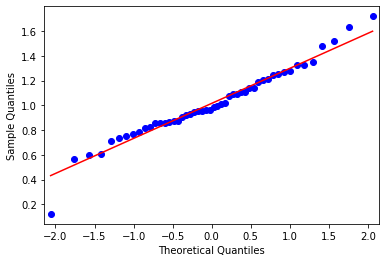

In [25]:
## Draw QQ plot after herb treatment
import statsmodels.api as sm
import pylab as py
sm.qqplot(df3['number'], line ='s')
py.show()

*Shapiro-Wilk normality test*
*IF P-value > 0.05, data are not significantly different from normal distribution ==> assume normality

In [31]:
## Before treatment
from scipy import stats
shapiro_test = stats.shapiro(df2['number'])
shapiro_test

(0.9835100173950195, 0.7061526775360107)

In [32]:
## After herb treatment
from scipy import stats
shapiro_test = stats.shapiro(df3['number'])
shapiro_test

(0.9750882387161255, 0.36778828501701355)

#### Perform correct t-test for determine if there is significant change in conjunctive redness after herb treatment

- t-score = 3.49 which is greater than 0.05 significant level 1.9673*
- notreat mean > herb mean*
- There is significant change of before and after herb treatment*

In [34]:
from scipy import stats
stats.ttest_ind(df2['number'], df3['number'])

Ttest_indResult(statistic=3.4943873248217954, pvalue=0.000714998683492139)